In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [4]:
def load_graph(f):
    g = nx.drawing.nx_agraph.read_dot(f)
    mapping = {
        n: data["label"]
        for n, data in g.nodes(data=True)
    }

    g=nx.relabel_nodes(g, mapping, copy=False)
    return g

In [5]:
G = load_graph("/grid_mnt/vol_home/llr/cms/cuisset/hgcal/tau/prod_taus_v3/producers_graph/dependency.dot")

In [6]:
to_remove = ['offlineBeamSpot',
 'offlinePrimaryVertices',
 'offlineSlimmedPrimaryVertices',
 'prunedGenParticles',
 'firstStepPrimaryVertices',
 'MeasurementTrackerEvent',
 'fixedGridRhoAll']
Gc = G.copy()
Gc.remove_nodes_from(to_remove)

def remove_sel(x):
    if x.endswith("SecondaryVertices") or "PrimaryVertices" in x: return True
    if x.startswith("slimmed") and not "tau" in x and not "Tau" in x: return True
    if x.startswith("ak") and x.endswith("PFJets"): return True
    return False
to_remove = set(["generalTracks",  "lostTracks", "muons", "packedPFCandidates", "slimmedPhotons", "slimmedElectrons","particleFlow", "gedPhotons", "gedGsfElectrons", "slimmedElectrons", ]).union(x for x in Gc.nodes() if remove_sel(x))
Gc.remove_edges_from(list((n, suc) for n in to_remove for suc in Gc.successors(n) ))
len(G), len(Gc), len(G.edges), len(Gc.edges)

(682, 675, 1772, 1374)

In [7]:
to_remove

{'ak4PFJets',
 'firstStepPrimaryVerticesUnsorted',
 'gedGsfElectrons',
 'gedPhotons',
 'generalTracks',
 'goodOfflinePrimaryVertices',
 'inclusiveCandidateSecondaryVertices',
 'inclusiveSecondaryVertices',
 'lostTracks',
 'muons',
 'offlinePrimaryVertices4D',
 'offlinePrimaryVerticesWithBS',
 'offlineSlimmedPrimaryVertices4D',
 'packedPFCandidates',
 'particleFlow',
 'slimmedElectrons',
 'slimmedElectronsHGC',
 'slimmedGenJets',
 'slimmedJets',
 'slimmedJetsNoDeepFlavour',
 'slimmedJetsPuppi',
 'slimmedJetsPuppiNoDeepTags',
 'slimmedMuonTrackExtras',
 'slimmedMuons',
 'slimmedPatTrigger',
 'slimmedPhotons',
 'slimmedSecondaryVertices',
 'unsortedOfflinePrimaryVertices',
 'unsortedOfflinePrimaryVertices4D'}

In [8]:
list(list(Gc.successors(n)) for n in ["generalTracks"])

[[]]

In [9]:
help(G)

Help on MultiDiGraph in module networkx.classes.multidigraph object:

class MultiDiGraph(networkx.classes.multigraph.MultiGraph, networkx.classes.digraph.DiGraph)
 |  MultiDiGraph(*args, backend=None, **kwargs)
 |
 |  A directed graph class that can store multiedges.
 |
 |  Multiedges are multiple edges between two nodes.  Each edge
 |  can hold optional data or attributes.
 |
 |  A MultiDiGraph holds directed edges.  Self loops are allowed.
 |
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes. By convention `None` is not used as a node.
 |
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of 

In [10]:
H = G.copy()
H.remove_nodes_from([n for n, d in G.out_degree() if d > 30])
len(G), len(H), len(G.edges), len(H.edges), []

(682, 681, 1772, 1684, [])

In [11]:
[G.nodes[n] for n, d in G.in_degree() if d > 10]

[{'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'MeasurementTrackerEvent',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'MeasurementTrackerEventProducer'},
 {'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'cscSegments',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'CSCSegmentProducer'},
 {'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'ecalRecHit',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'EcalRecHitProducer'},
 {'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'firstStepPrimaryVertices',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'RecoChargedRefCandidatePrimaryVertexSorter'},
 {'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'generalTracks',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'DuplicateListMerger'},
 {'color': 'black',
  'fillcolor': 'lightgrey',
  'label': 'hbhereco',
  'shape': 'box',
  'style': 'filled',
  'tooltip': 'HBHEPhase1Reconstructor'},
 {'color': 'black',
  'fillcolor': 'ligh

In [12]:
G.nodes(data=True)

NodeDataView({'kinematicSelectedTauValDenominatorQCD': {'color': 'black', 'fillcolor': 'white', 'label': 'kinematicSelectedTauValDenominatorQCD', 'shape': 'diamond', 'style': 'filled', 'tooltip': 'GenJetSelector'}, 'kinematicSelectedPFJets': {'color': 'black', 'fillcolor': 'white', 'label': 'kinematicSelectedPFJets', 'shape': 'diamond', 'style': 'filled', 'tooltip': 'TauValPFJetSelector'}, 'PFJetsId': {'color': 'black', 'fillcolor': 'white', 'label': 'PFJetsId', 'shape': 'diamond', 'style': 'filled', 'tooltip': 'TauValPFJetSelector'}, 'CleanedPFJets': {'color': 'black', 'fillcolor': 'white', 'label': 'CleanedPFJets', 'shape': 'box', 'style': 'filled', 'tooltip': 'TauValJetViewCleaner'}, 'ElPrimaryVertexFilter': {'color': 'black', 'fillcolor': 'white', 'label': 'ElPrimaryVertexFilter', 'shape': 'diamond', 'style': 'filled', 'tooltip': 'VertexSelector'}, 'ElBestPV': {'color': 'black', 'fillcolor': 'white', 'label': 'ElBestPV', 'shape': 'box', 'style': 'filled', 'tooltip': 'HighestSumP4Pr

In [13]:
G["276"]

KeyError: '276'

In [14]:

def n_hop_subgraph(G, source, N):
    nodes = nx.single_source_shortest_path_length(G.to_undirected(), source, cutoff=N)
    return G.subgraph(nodes.keys())
def ancestors_and_n_hops(G, source, Nhops):
    return G.subgraph(set(nx.single_source_shortest_path_length(G.to_undirected(), source, cutoff=Nhops).keys()).union(nx.descendants(G, source)))
def ancestors_up_to(G, source, N):
    return G.subgraph(nx.single_source_shortest_path_length(G, source, cutoff=N).keys())

def plot(Gp, figsize=(10, 8)):
    pos = nx.nx_agraph.pygraphviz_layout(Gp, prog="dot")

    plt.figure(figsize=figsize)
    nx.draw(
        Gp,
        pos,
        with_labels=True,
        labels={key: node_data["label"]+"\n"+node_data["tooltip"] for key, node_data in Gp.nodes(data=True)},
        node_size=2000,
        node_color="lightgreen",
        arrows=True,
        node_shape="s"
    )

In [ ]:
next(iter(G.nodes(data=True)))[0]

'276'

In [ ]:
G.nodes["276"]

{'color': 'black',
 'fillcolor': 'white',
 'label': 'kinematicSelectedTauValDenominatorQCD',
 'shape': 'diamond',
 'style': 'filled',
 'tooltip': 'GenJetSelector'}

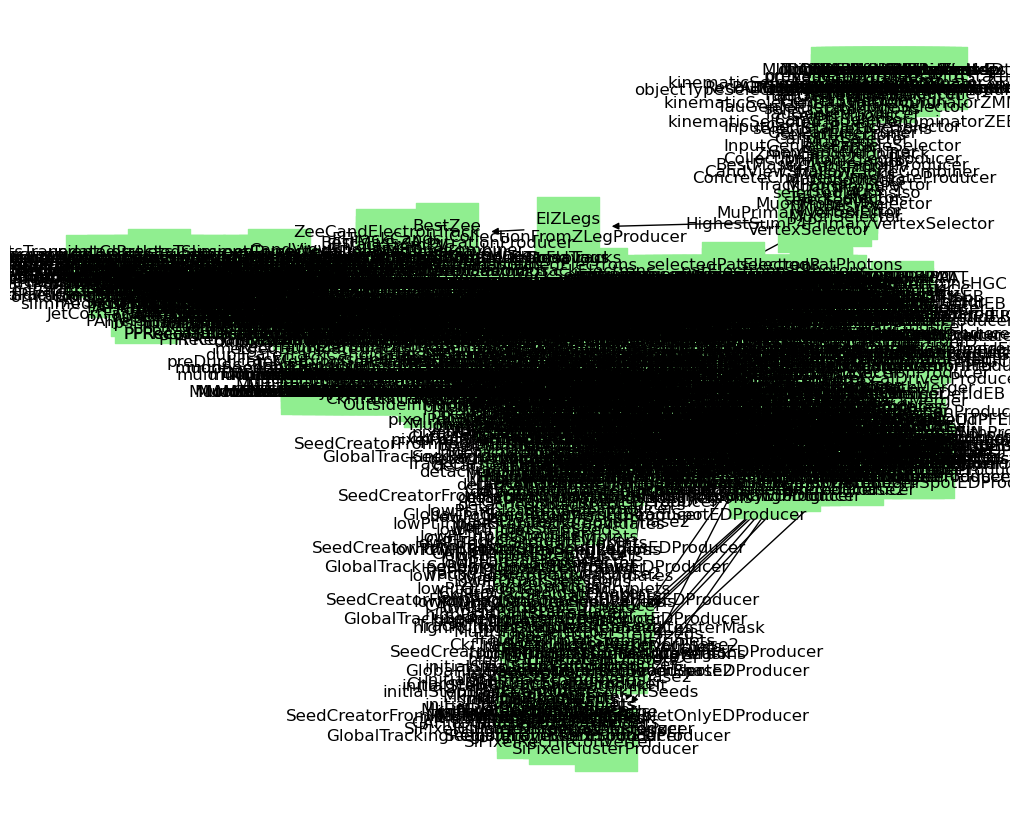

In [15]:
plot(Gc)

In [ ]:
len(ancestors_and_n_hops(G, "MINIAODSIMoutput", 5))

637

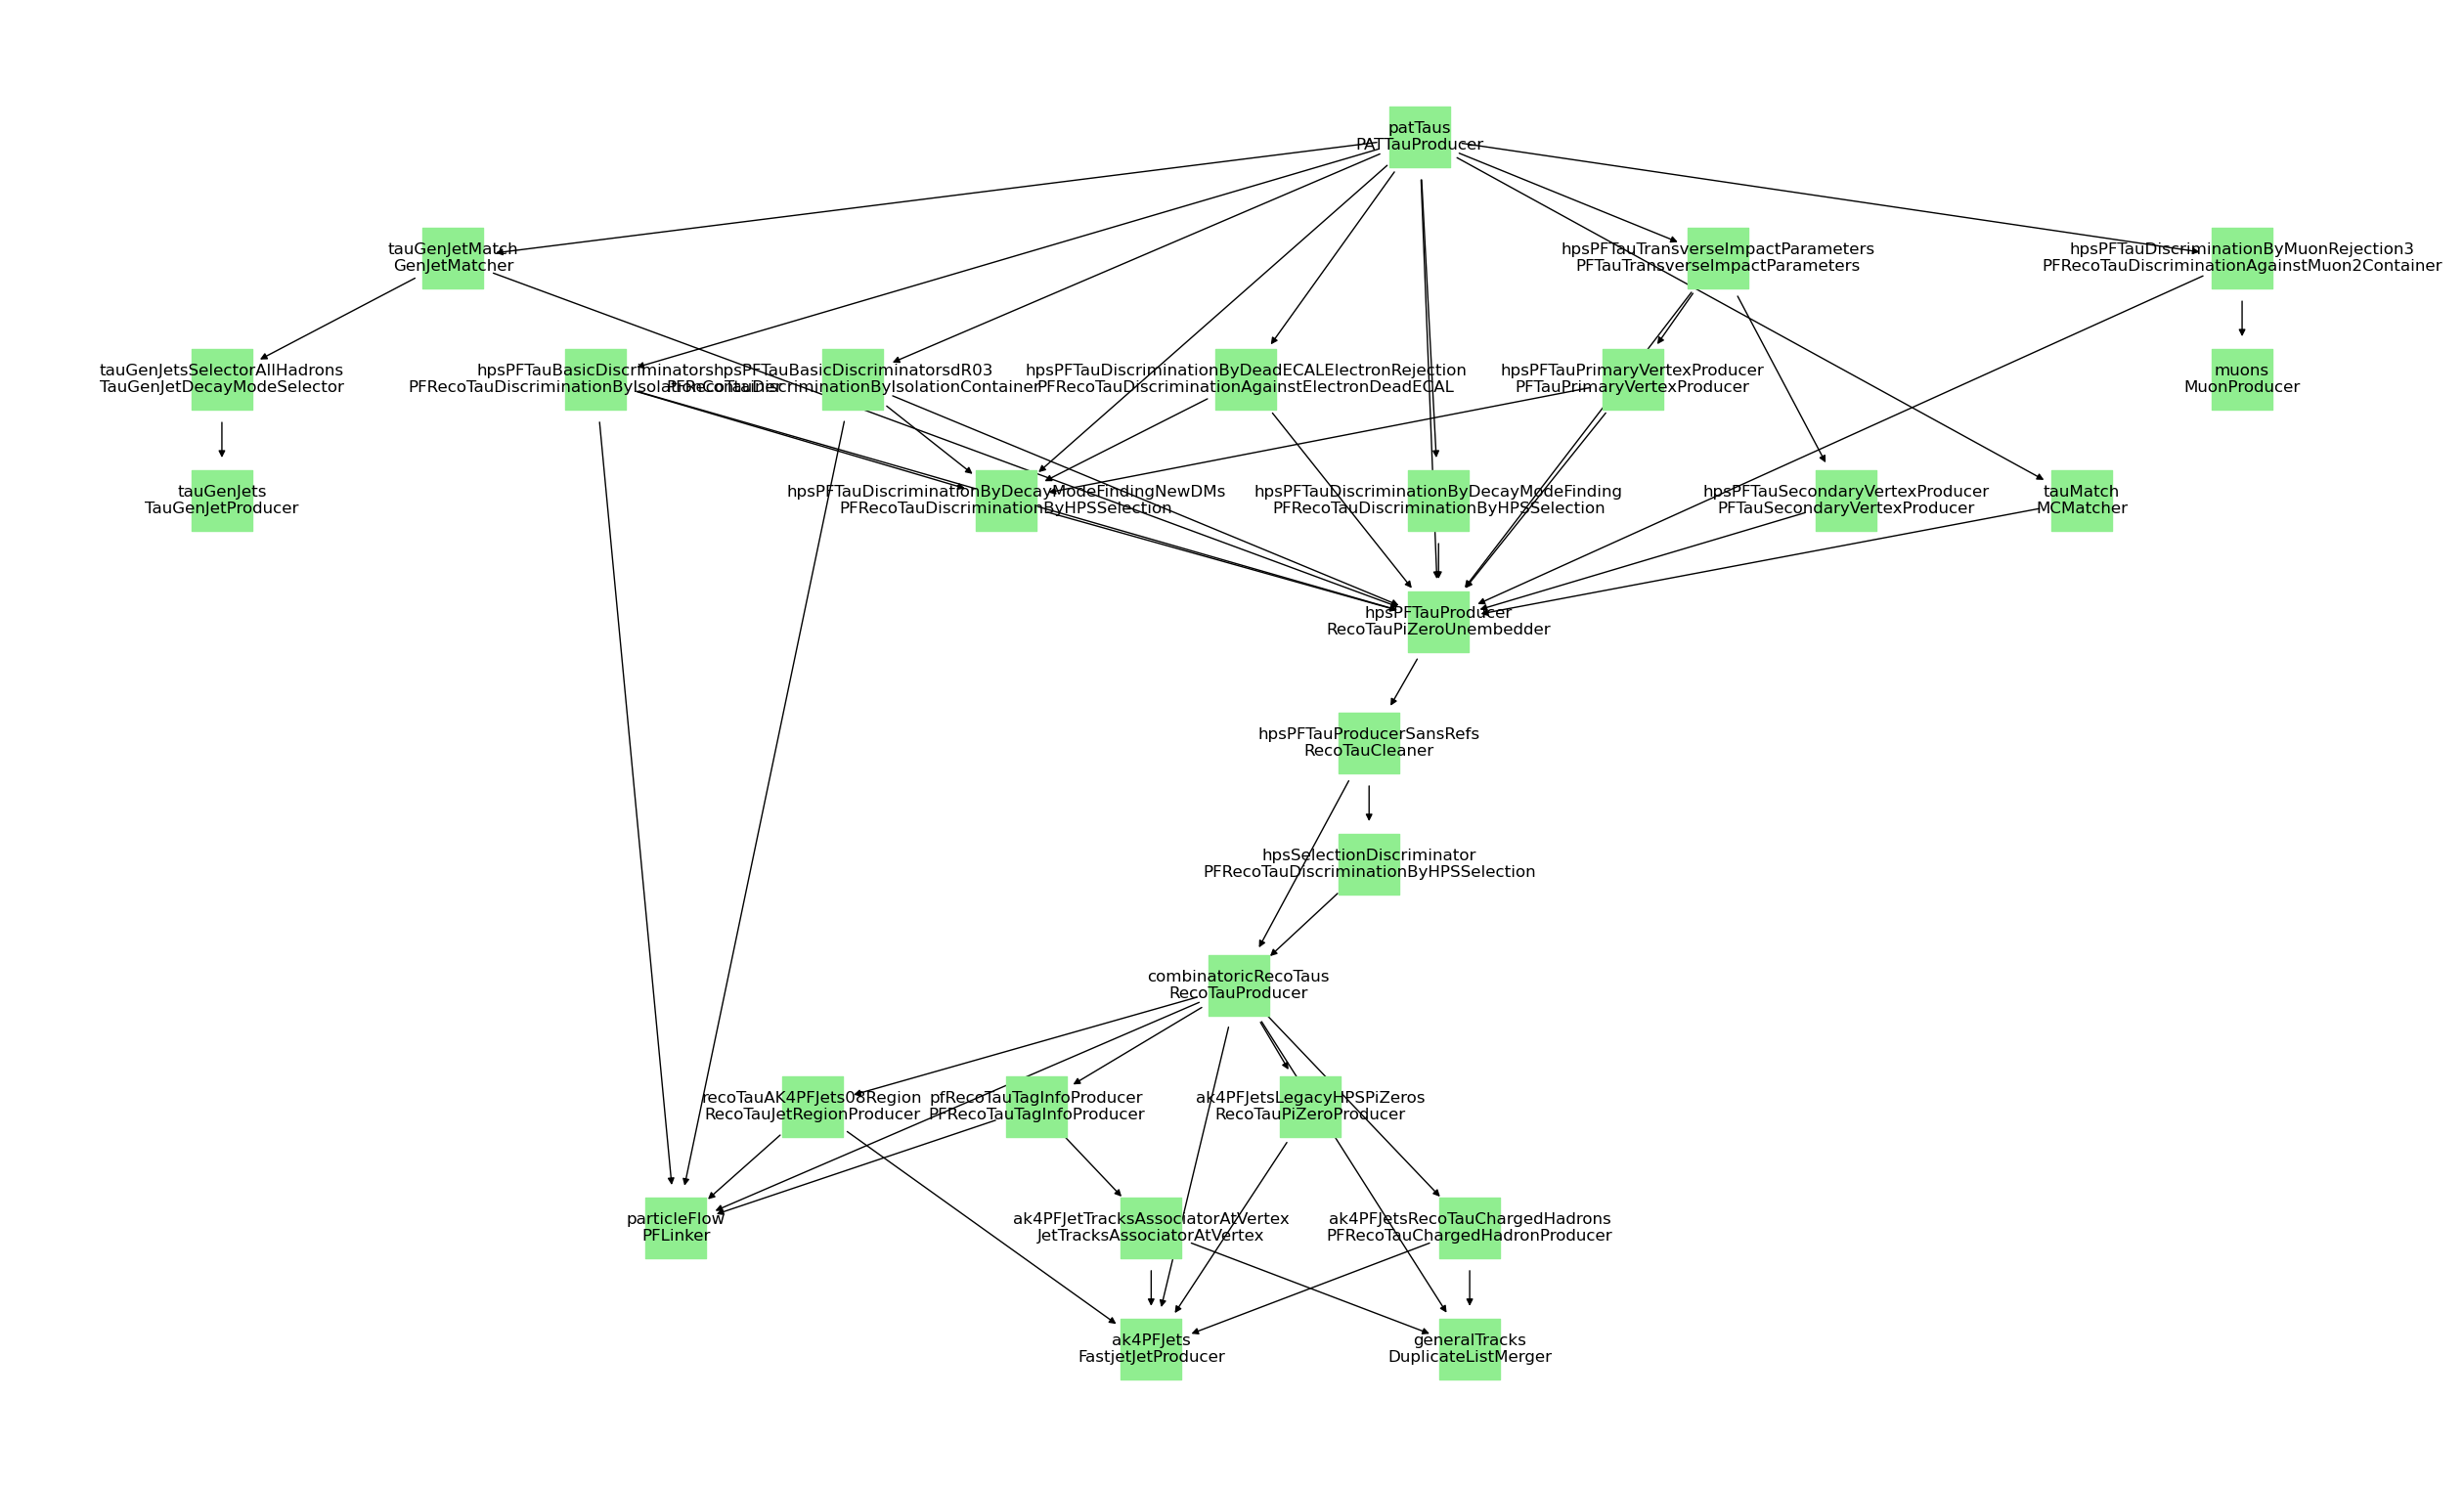

In [16]:
plot(ancestors_up_to(Gc, "patTaus", None), figsize=(25, 15))